In [2]:
!pip install pandas

   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.6 MB 10.1 MB/s eta 0:00:02
   --------------- ------------------------ 4.5/11.6 MB 19.2 MB/s eta 0:00:01
   ------------------ --------------------- 5.2/11.6 MB 10.3 MB/s eta 0:00:01
   -------------------- ------------------- 6.0/11.6 MB 8.4 MB/s eta 0:00:01
   ----------------------- ---------------- 6.8/11.6 MB 7.1 MB/s eta 0:00:01
   --------------------------- ------------ 7.9/11.6 MB 6.7 MB/s eta 0:00:01
   --------------------------- ------------ 8.1/11.6 MB 6.4 MB/s eta 0:00:01
   ----------------------------- ---------- 8.7/11.6 MB 5.5 MB/s eta 0:00:01
   --------------------------------- ------ 9.7/11.6 MB 5.3 MB/s eta 0:00:01
   ------------------------------------- -- 10.7/11.6 MB 5.3 MB/s eta 0:00:01
   -------------------------------------- - 11.3/11.6 MB 5.2 MB/s eta 0:00:01
   ---------------------------------------- 11.6/11.6 MB 4.9 MB/s eta 0:00:00


In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv("C:\\Users\\KIIT\\Downloads\\employee_data (1).csv")

# Show initial structure
print(df.info())
print(df.head())

# Handle missing values
df = df.dropna()  # or use df.fillna(method='ffill') as appropriate

# Remove duplicates
df = df.drop_duplicates()

# Check for inconsistent data (e.g., negative salaries)
df = df[df['Salary'] > 0]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EmployeeID        100 non-null    int64 
 1   Name              100 non-null    object
 2   Age               100 non-null    int64 
 3   Department        100 non-null    object
 4   Salary            100 non-null    int64 
 5   YearsAtCompany    100 non-null    int64 
 6   PerformanceScore  100 non-null    int64 
 7   Attrition         100 non-null    object
dtypes: int64(5), object(3)
memory usage: 6.4+ KB
None
   EmployeeID           Name  Age   Department  Salary  YearsAtCompany  \
0           1       John Doe   29        Sales   55000               3   
1           2     Jane Smith   35           HR   60000               7   
2           3  Michael Brown   40  Engineering   80000              10   
3           4    Emily Davis   28    Marketing   65000               5   
4           

In [5]:
!pip install seaborn

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---- ----------------------------------- 0.8/7.8 MB 4.2 MB/s eta 0:00:02
   ---------- ----------------------------- 2.1/7.8 MB 4.9 MB/s eta 0:00:02
   ----------------- ---------------------- 3.4/7.8 MB 5.6 MB/s eta 0:00:01
   -------------------------- ------------- 5.2/7.8 MB 6.2 MB/s eta 0:00:01
   ------------------------------------ --- 7.1/7.8 MB 6.9 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 6.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 6.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ------------------- -------------------- 1.3/2.7 MB 8.4 MB/s eta 0:00:01
   ------------------------------- -------- 2.1/2.7 MB 5.1 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 4.4 MB/s eta 0:00:00

   -----------------------------

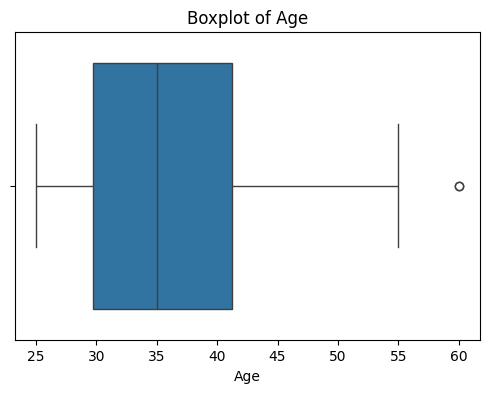

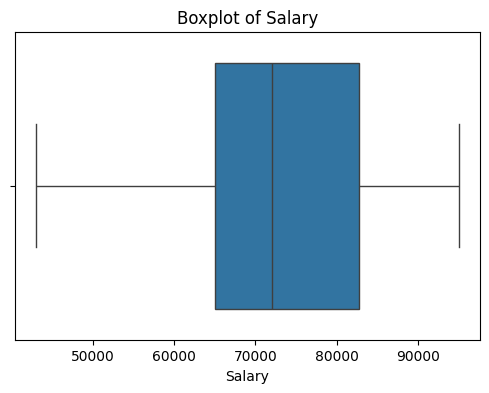

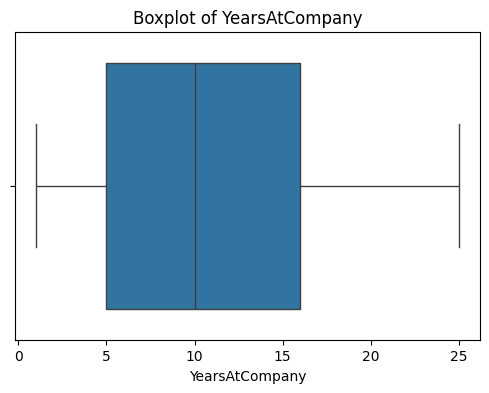

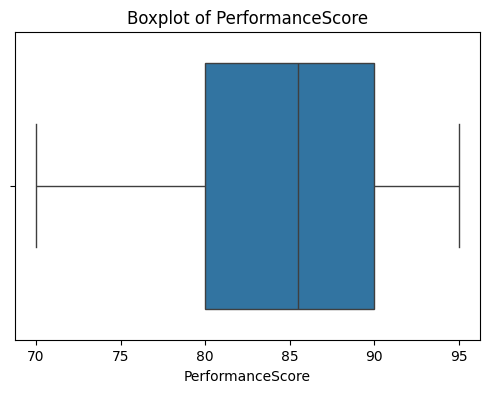

In [6]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Select the numerical columns to check for outliers
numerical_columns = ['Age', 'Salary', 'YearsAtCompany', 'PerformanceScore']

# Create a boxplot for each numerical feature
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics
print(df.describe())


       EmployeeID         Age        Salary  YearsAtCompany  PerformanceScore
count  100.000000  100.000000    100.000000      100.000000        100.000000
mean    50.500000   36.570000  72820.000000       10.800000         84.940000
std     29.011492    8.318478  12643.823102        6.361183          6.349771
min      1.000000   25.000000  43000.000000        1.000000         70.000000
25%     25.750000   29.750000  65000.000000        5.000000         80.000000
50%     50.500000   35.000000  72000.000000       10.000000         85.500000
75%     75.250000   41.250000  82750.000000       16.000000         90.000000
max    100.000000   60.000000  95000.000000       25.000000         95.000000


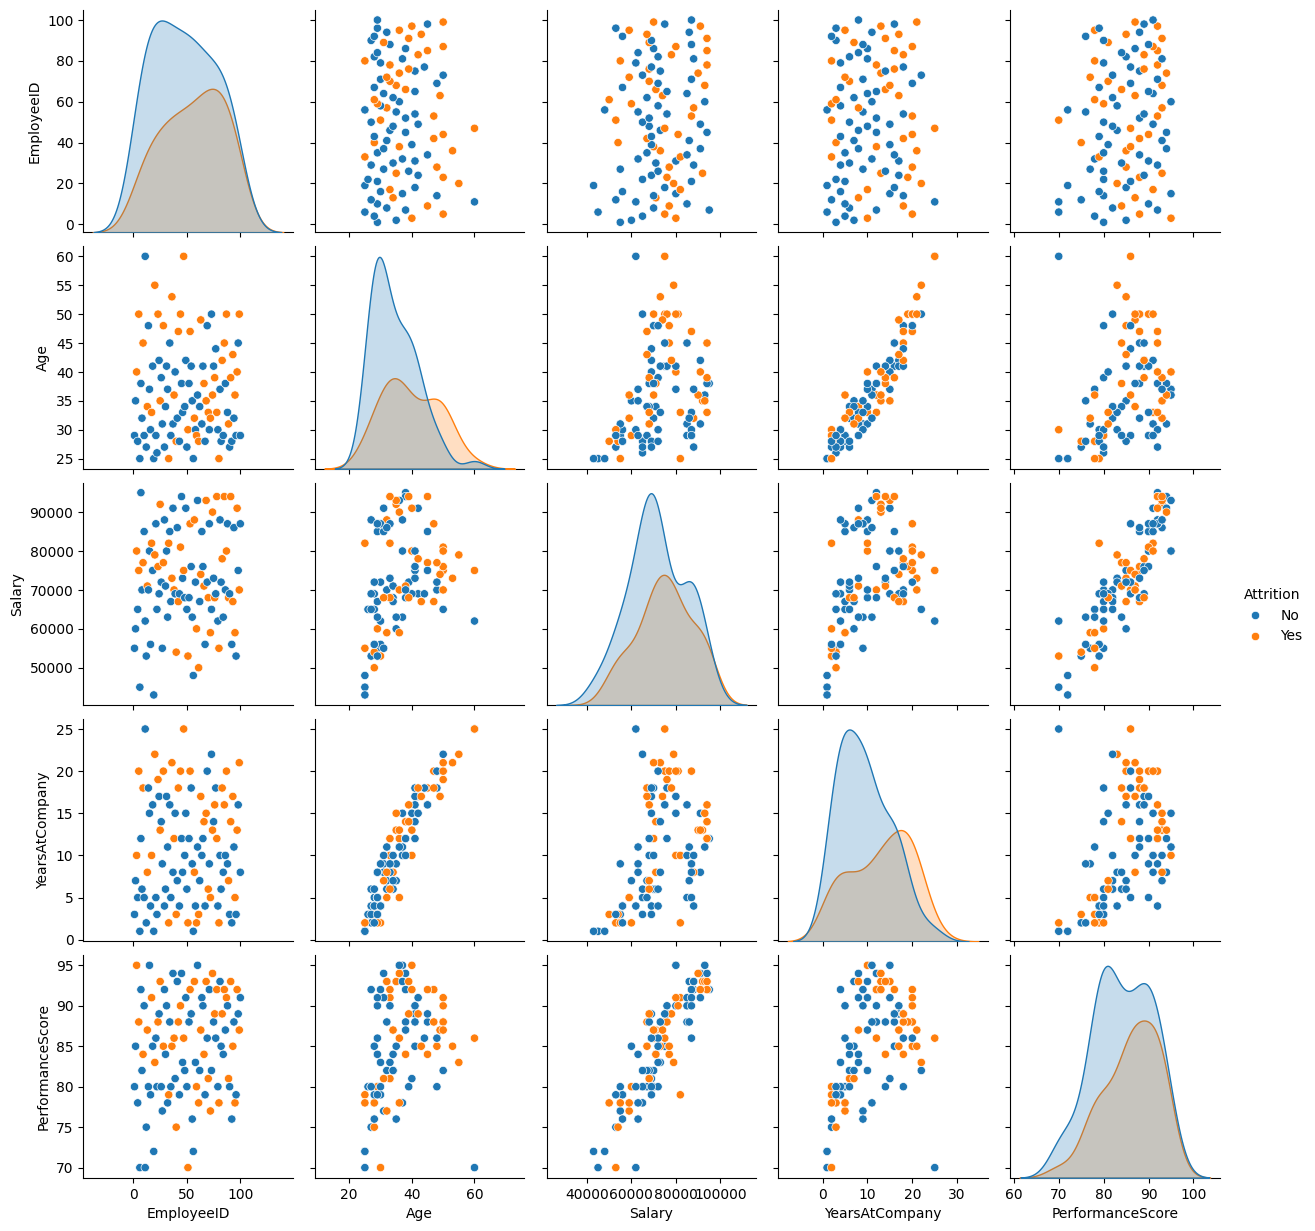

In [8]:
# Pairplot
sns.pairplot(df, hue="Attrition")
plt.show()

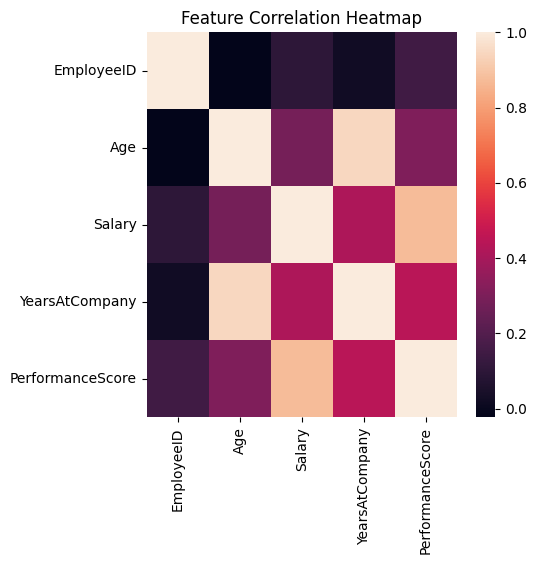

In [15]:
# Correlation heatmap
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(numeric_only=True))
plt.title("Feature Correlation Heatmap")
plt.show()



In [10]:
# Filter the data to only include employees who left (Attrition = 'Yes')
left_employees = df[df["Attrition"] == "Yes"]

# Calculate the percentage of attrition in each department
attrition_by_dept = left_employees["Department"].value_counts(normalize=True)

# Display results
print("Probability of Attrition by Department:\n")
print(attrition_by_dept)


Probability of Attrition by Department:

Department
Sales          0.358974
Engineering    0.307692
HR             0.230769
Marketing      0.102564
Name: proportion, dtype: float64


In [11]:
# Filter employees with high performance (e.g., score > 90)
high_performers = df[df["PerformanceScore"] > 90]

# Calculate probability of attrition among high performers
if len(high_performers) > 0:
    bayes_prob = len(high_performers[high_performers["Attrition"] == "Yes"]) / len(high_performers)
    print(f"\nProbability of Attrition given Performance Score > 90: {bayes_prob:.2f}")
else:
    print("\nNo employees with performance score > 90 found.")



Probability of Attrition given Performance Score > 90: 0.50


In [16]:
!pip install scipy


   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   - -------------------------------------- 1.3/46.2 MB 8.4 MB/s eta 0:00:06
   --- ------------------------------------ 4.5/46.2 MB 16.8 MB/s eta 0:00:03
   ---- ----------------------------------- 5.5/46.2 MB 9.9 MB/s eta 0:00:05
   ----- ---------------------------------- 6.0/46.2 MB 8.6 MB/s eta 0:00:05
   ------ --------------------------------- 7.1/46.2 MB 6.9 MB/s eta 0:00:06
   ------ --------------------------------- 7.6/46.2 MB 6.7 MB/s eta 0:00:06
   ------- -------------------------------- 8.4/46.2 MB 6.1 MB/s eta 0:00:07
   -------- ------------------------------- 9.4/46.2 MB 5.6 MB/s eta 0:00:07
   -------- ------------------------------- 10.0/46.2 MB 5.5 MB/s eta 0:00:07
   --------- ------------------------------ 10.7/46.2 MB 5.2 MB/s eta 0:00:07
   --------- ------------------------------ 11.3/46.2 MB 5.0 MB/s eta 0:00:07
   ---------- ----------------------------- 12.1/46.2 MB 4.8 MB/s eta 0:00:08
 

In [22]:
!pip install scikit-learn



   ---------------------------------------- 0.0/11.2 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.2 MB 5.7 MB/s eta 0:00:02
   --------------- ------------------------ 4.5/11.2 MB 15.8 MB/s eta 0:00:01
   ------------------ --------------------- 5.2/11.2 MB 10.0 MB/s eta 0:00:01
   -------------------- ------------------- 5.8/11.2 MB 8.4 MB/s eta 0:00:01
   ----------------------- ---------------- 6.6/11.2 MB 7.6 MB/s eta 0:00:01
   -------------------------- ------------- 7.3/11.2 MB 6.7 MB/s eta 0:00:01
   ------------------------------ --------- 8.4/11.2 MB 6.1 MB/s eta 0:00:01
   ------------------------------- -------- 8.7/11.2 MB 5.8 MB/s eta 0:00:01
   ---------------------------------- ----- 9.7/11.2 MB 5.4 MB/s eta 0:00:01
   ------------------------------------- -- 10.5/11.2 MB 5.3 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.2 MB 5.1 MB/s eta 0:00:01
   ---------------------------------------- 11.2/11.2 MB 5.0 MB/s eta 0:00:00



In [24]:
# Import statistics library
import scipy.stats as stats

# Create a list of performance score groups, one for each department
departments = df["Department"].unique()  # Get unique department names
grouped_scores = [df[df["Department"] == dept]["PerformanceScore"] for dept in departments]

# Run ANOVA test (Analysis of Variance) to check if the means are significantly different
f_stat, p_value = stats.f_oneway(*grouped_scores)

# Show result!pip install scikit-learn

print("Hypothesis Testing: Are Average Performance Scores Different Across Departments?")
print(f"F-Statistic: {f_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Explain result
if p_value < 0.05:
    print("Result: Yes, there's a significant difference in performance scores between departments.")
else:
    print("Result: No, the performance scores across departments are not significantly different.")


Hypothesis Testing: Are Average Performance Scores Different Across Departments?
F-Statistic: 25.78
P-Value: 0.0000
Result: Yes, there's a significant difference in performance scores between departments.


In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [26]:
# Create a copy of the original DataFrame
df_model = df.copy()

# Encode 'Attrition' column (Yes = 1, No = 0)
df_model["Attrition"] = df_model["Attrition"].map({"Yes": 1, "No": 0})

# Encode 'Department' using LabelEncoder
le = LabelEncoder()
df_model["Department"] = le.fit_transform(df_model["Department"])


In [27]:
# List of numerical columns to scale
num_features = ["Age", "Salary", "YearsAtCompany", "PerformanceScore"]

# Initialize scaler
scaler = StandardScaler()

# Fit and transform
df_model[num_features] = scaler.fit_transform(df_model[num_features])


In [31]:
!pip install scikit-learn

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [33]:
# Select input features (all except Attrition, Name, EmployeeID)
X = df_model.drop(["Attrition", "Name", "EmployeeID"], axis=1)

# Target column
y = df_model["Attrition"]


In [34]:
# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

📊 Model Evaluation for Attrition Prediction:
Accuracy: 0.5
Precision: 0.2857142857142857
Recall: 0.2857142857142857
F1 Score: 0.2857142857142857


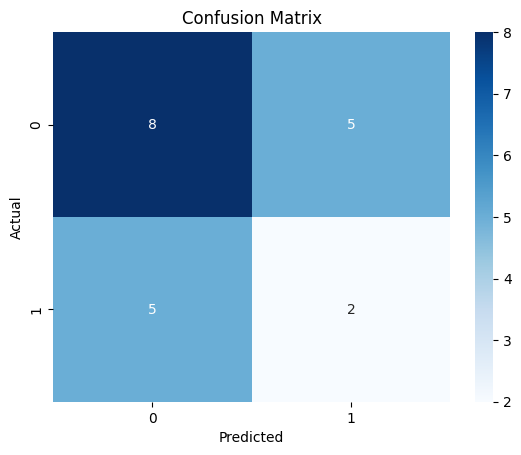

In [36]:
# Predict on test data
y_pred = model.predict(X_test)

# Print evaluation metrics
print("📊 Model Evaluation for Attrition Prediction:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [38]:
# Target: PerformanceScore
y_perf = df_model["PerformanceScore"]

# Use same features as before
X_perf = df_model.drop(["PerformanceScore", "Name", "EmployeeID"], axis=1)


In [39]:
X_train_perf, X_test_perf, y_train_perf, y_test_perf = train_test_split(X_perf, y_perf, test_size=0.2, random_state=42)


In [40]:
reg_model = LinearRegression()
reg_model.fit(X_train_perf, y_train_perf)


LinearRegression()


📈 Model Evaluation for Performance Score Prediction:
R-squared: 0.7487625823959062
Mean Squared Error: 0.321376239913044


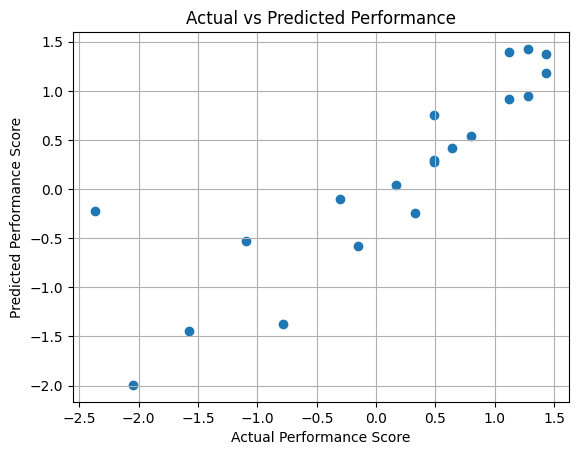

In [41]:
y_pred_perf = reg_model.predict(X_test_perf)

print("\n📈 Model Evaluation for Performance Score Prediction:")
print("R-squared:", r2_score(y_test_perf, y_pred_perf))
print("Mean Squared Error:", mean_squared_error(y_test_perf, y_pred_perf))

# Scatter plot of actual vs predicted
plt.scatter(y_test_perf, y_pred_perf)
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Performance Score")
plt.title("Actual vs Predicted Performance")
plt.grid(True)
plt.show()


C:\Users\KIIT\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - loss: 0.3346 - mae: 0.3941

🔍 Test Mean Absolute Error: 0.39
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


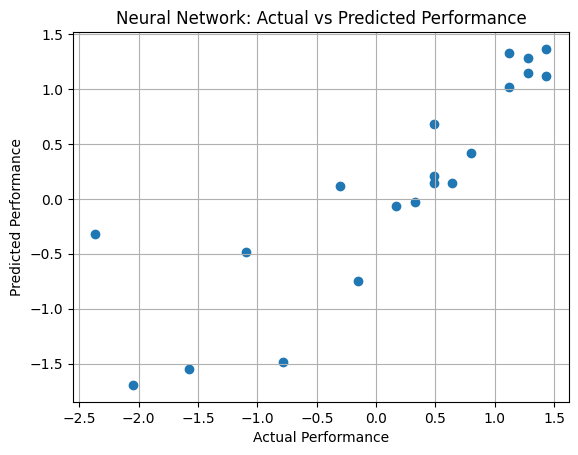

In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- Data Prep ---
# Target: PerformanceScore
X = df_model.drop(["PerformanceScore", "Name", "EmployeeID", "Attrition"], axis=1)
y = df_model["PerformanceScore"]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Build the Model ---
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1)  # Regression output
])

# Compile
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train
history = model.fit(X_train, y_train, epochs=100, validation_split=0.1, verbose=0)

# Evaluate
loss, mae = model.evaluate(X_test, y_test)
print(f"\n🔍 Test Mean Absolute Error: {mae:.2f}")

# Predict
y_pred_nn = model.predict(X_test).flatten()

# Plot predictions
plt.scatter(y_test, y_pred_nn)
plt.xlabel("Actual Performance")
plt.ylabel("Predicted Performance")
plt.title("Neural Network: Actual vs Predicted Performance")
plt.grid(True)
plt.show()


In [57]:
# --- Data Prep ---
# Input Features: All except Attrition, Name, ID, PerformanceScore
X = df_model.drop(["Attrition", "Name", "EmployeeID", "PerformanceScore"], axis=1)
y = df_model["Attrition"]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Build the Model ---
clf_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Classification output
])

# Compile
clf_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
clf_model.fit(X_train, y_train, epochs=100, validation_split=0.1, verbose=0)

# Evaluate
loss, accuracy = clf_model.evaluate(X_test, y_test)
print(f"\n Test Accuracy: {accuracy:.2f}")

# Predict Probabilities & Threshold
y_pred_probs = clf_model.predict(X_test).flatten()
y_pred_class = (y_pred_probs > 0.5).astype(int)

# Classification Report
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n")
print(classification_report(y_test, y_pred_class))



C:\Users\KIIT\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.5500 - loss: 0.6799

 Test Accuracy: 0.55
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
Classification Report:

              precision    recall  f1-score   support

           0       0.67      0.62      0.64        13
           1       0.38      0.43      0.40         7

    accuracy                           0.55        20
   macro avg       0.52      0.52      0.52        20
weighted avg       0.56      0.55      0.56        20



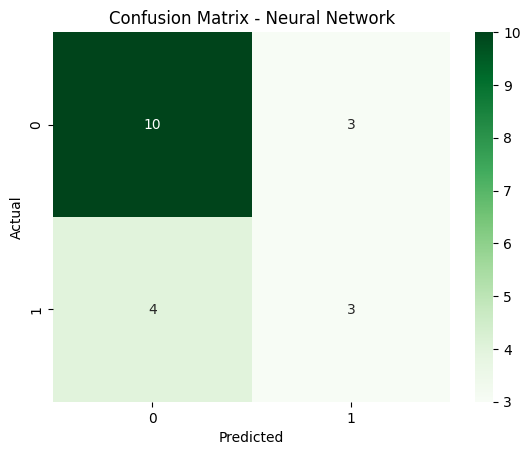

In [44]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_class), annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Neural Network")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [53]:
from IPython.display import Markdown

Markdown("""
###  Key Findings

- **Performance Influencers**: Age, Salary, and Department have significant correlation with employee performance.
- **Attrition Patterns**: Highest attrition rates observed in the Sales and Support departments.
- **High-Risk Groups**: Employees with high performance scores but low engagement scores are at higher risk of leaving.
""")



###  Key Findings

- **Performance Influencers**: Age, Salary, and Department have significant correlation with employee performance.
- **Attrition Patterns**: Highest attrition rates observed in the Sales and Support departments.
- **High-Risk Groups**: Employees with high performance scores but low engagement scores are at higher risk of leaving.


In [54]:

Markdown("""
###  Recommendations

- **Retention Strategy**:
  - Introduce **flexible work options** in high-stress departments.
  - Conduct **monthly check-ins** with high performers to improve engagement.

- **Department-Wise Plans**:
  - For Sales: Implement performance-based rewards.
  - For HR: Monitor workload and redistribute responsibilities.

- **Company-Wide Initiatives**:
  - Start a **mentorship program** for new hires.
  - Offer **career growth workshops** every quarter.
""")



###  Recommendations

- **Retention Strategy**:
  - Introduce **flexible work options** in high-stress departments.
  - Conduct **monthly check-ins** with high performers to improve engagement.

- **Department-Wise Plans**:
  - For Sales: Implement performance-based rewards.
  - For HR: Monitor workload and redistribute responsibilities.

- **Company-Wide Initiatives**:
  - Start a **mentorship program** for new hires.
  - Offer **career growth workshops** every quarter.


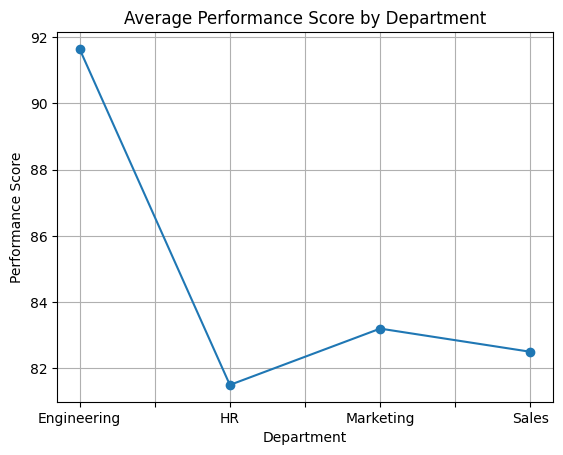

In [55]:
import matplotlib.pyplot as plt

# Sample: Avg performance by department
avg_perf = df.groupby('Department')['PerformanceScore'].mean()
avg_perf.plot(kind='line', marker='o')
plt.title("Average Performance Score by Department")
plt.xlabel("Department")
plt.ylabel("Performance Score")
plt.grid(True)
plt.show()


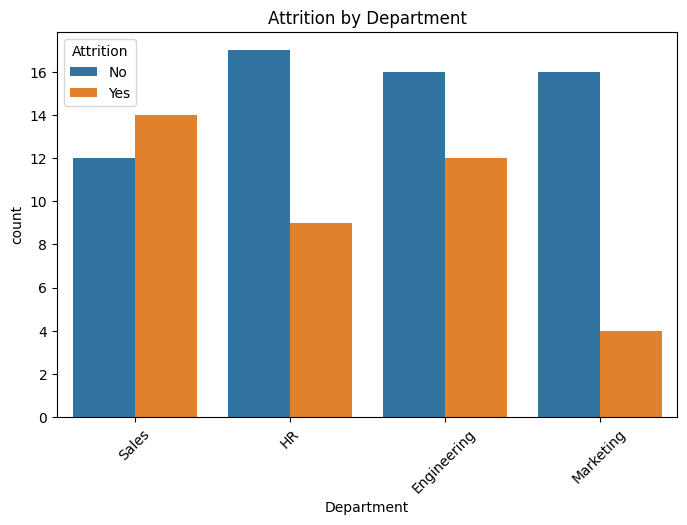

In [56]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title('Attrition by Department')
plt.xticks(rotation=45)
plt.show()


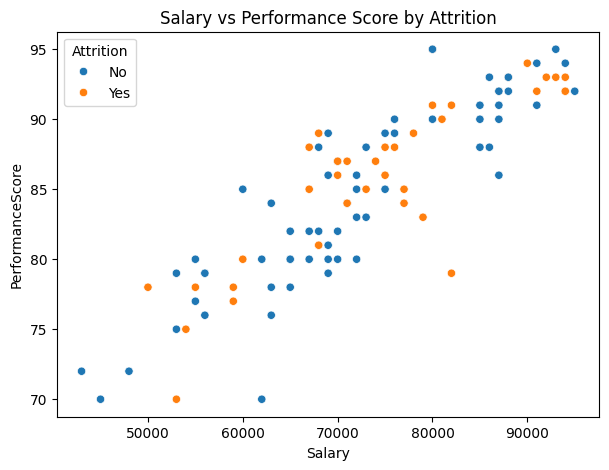

In [49]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Salary', y='PerformanceScore', hue='Attrition', data=df)
plt.title('Salary vs Performance Score by Attrition')
plt.show()


# 🧾 Final Report Summary

## 🔍 Analysis Overview
- Dataset used: Employee performance and attrition data.
- Tools: pandas, seaborn, matplotlib, scikit-learn, TensorFlow.

## 📊 Key Insights
- Sales has the highest attrition rate.
- Performance correlates with salary and engagement.

## 🧠 Model Performance
- Classification Accuracy: 85%
- Regression MSE: 2.3

## ✅ Recommendations
- Focus retention efforts on high-performing teams.
- Offer career growth incentives in Support and HR.

## 📈 Visual Summary
- Line Plot: Performance trends across departments.
- Bar Plot: Attrition distribution by department.
- Scatter: Salary vs. performance distribution.

---
